### 데이터 로딩

In [1]:
import pandas as pd
import numpy as np

In [2]:
# sklearn 데이터셋에서 로딩
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
#sklearn에서 가져오는 데이터셋은 다 딕셔너리 형태
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
 #print(iris['DESCR'])


In [5]:
# 딕셔너리 ㅣ형태로는 머신러닝이 안된다
# 데이터프레임으로 변환
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['target'] = iris.target
df.sample(7)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
6,4.6,3.4,1.4,0.3,0
25,5.0,3.0,1.6,0.2,0
122,7.7,2.8,6.7,2.0,2
119,6.0,2.2,5.0,1.5,2
21,5.1,3.7,1.5,0.4,0
90,5.5,2.6,4.4,1.2,1
12,4.8,3.0,1.4,0.1,0


In [6]:
# 0, 1, 2 로 표현된 lable(class) 를 문자열로 매핑
df['target'] = df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
df.sample(7)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
102,7.1,3.0,5.9,2.1,virginica
116,6.5,3.0,5.5,1.8,virginica
95,5.7,3.0,4.2,1.2,versicolor
3,4.6,3.1,1.5,0.2,setosa
32,5.2,4.1,1.5,0.1,setosa
68,6.2,2.2,4.5,1.5,versicolor
39,5.1,3.4,1.5,0.2,setosa


### EDA: 탐색적 데이터 분석, Exploratory Data Analysis

In [10]:
# dataframe의 기본정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# 기본 통계정보
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# 타깃값 분포 확인
print(df['target'].value_counts(normalize=True ))

target
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64


In [11]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [12]:
#중복 데이터 확ㄷ인
df.duplicated().sum()

1

# 시각화


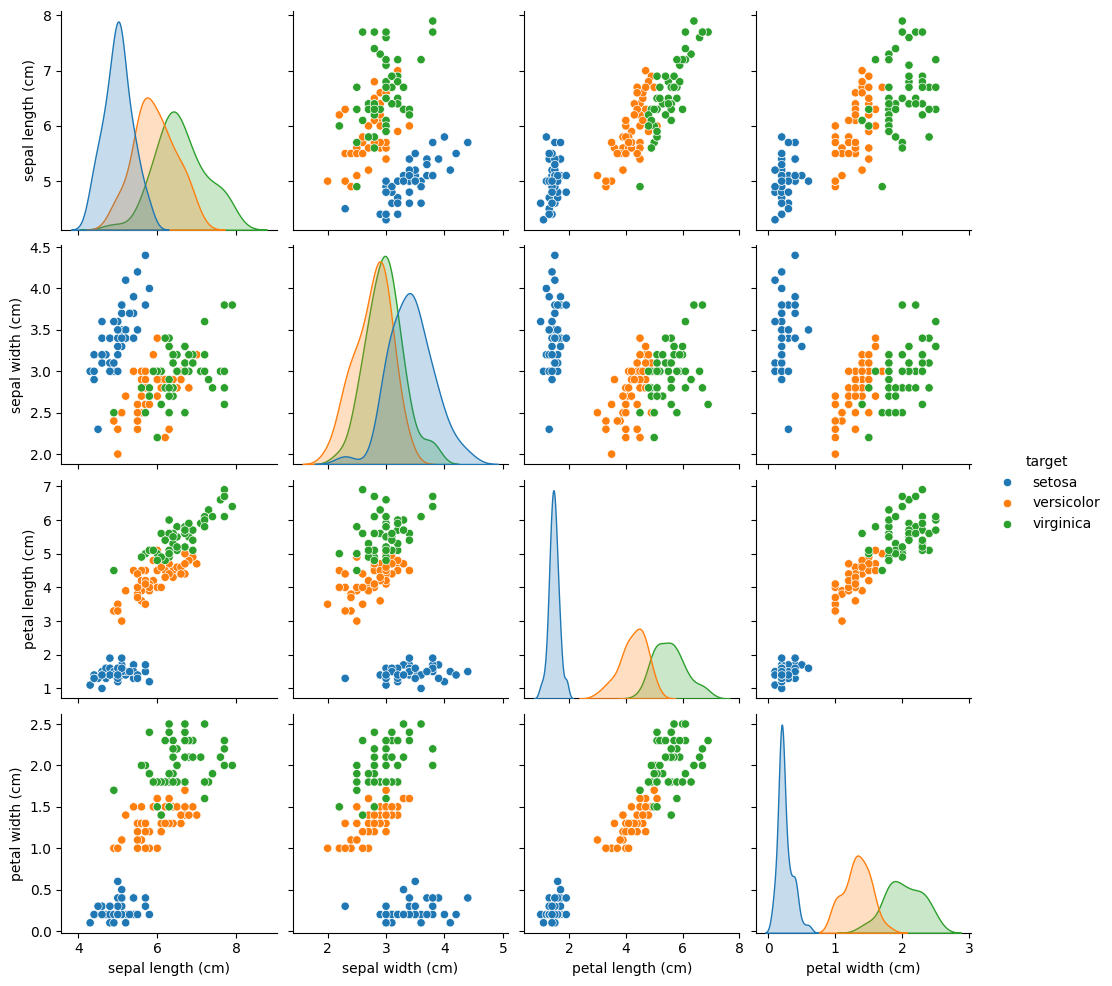

In [16]:
# 과제 1: pair plot 그리기
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, hue = 'target')


In [18]:
# 과제 2: 상관관계 히트맵 그리기
corr = df.corr(numeric_only=True)
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<Axes: >

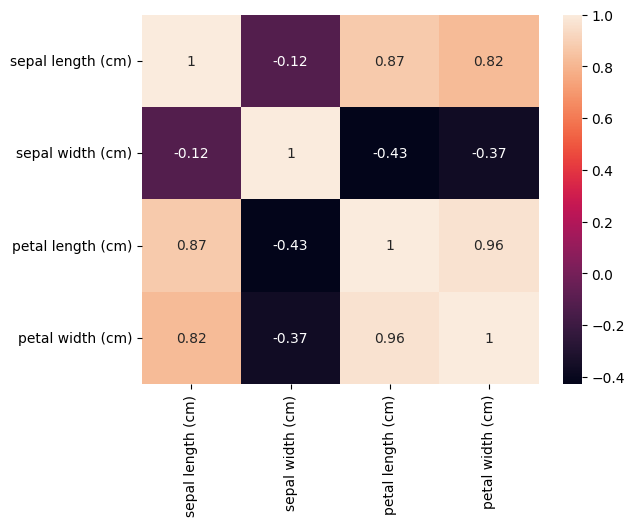

In [19]:
sns.heatmap(data=corr, annot = True)

# 머신러닝 데이터 전처리

In [21]:
# 과제 1. 독립변수와 종속변수 구분
X = df.drop(['target'], axis = 1)
y = df['target']
display(X,y)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object

In [26]:
# 과제 2. 훈령/테슽 데이터 구분 : test_size = 0.2
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=36, test_size = 0.2)


In [33]:
#과제: KNN 모델 생성, 학습, 훈류데이터/테스트데이터 정확도 출력
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('훈련데이터 정확도:', knn.score(X_train, y_train))
print('테스트 정확도:', knn.score(X_test, y_test))


훈련데이터 정확도: 0.9583333333333334
테스트 정확도: 1.0


In [34]:
#과제2: 그리드서치 + 교차검증: n_neighbors를 3~33까지 2간격으로
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors' : range(3,33,2)}
GSV_knn = GridSearchCV(KNeighborsClassifier(), params)
GSV_knn.fit(X_train, y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 33, 2)})

In [39]:
print(GSV_knn.best_params_)
knn_grid_search = GSV_knn.best_estimator_
print('train data:', knn_grid_search.score(X_train, y_train))
print('test data:' ,knn_grid_search.score(X_test, y_test))
print('gs_knn 교차검증:', GSV_knn.cv_results_['mean_test_score'])

{'n_neighbors': 5}
train data: 0.9583333333333334
test data: 1.0
gs_knn 교차검증: [0.96666667 0.98333333 0.96666667 0.96666667 0.96666667 0.975
 0.96666667 0.96666667 0.96666667 0.93333333 0.93333333 0.93333333
 0.94166667 0.93333333 0.93333333]


In [44]:
# 최적의 모델로 다시 정확도 계산
knn = GSV_knn.best_estimator_
print('gs_knn train score:', GSV_knn.score(X_train, y_train))
print('gs_knn test score:', GSV_knn.score(X_test, y_test))

gs_knn train score: 0.9583333333333334
gs_knn test score: 1.0


### 2. Decision Tree


*  Logistic Regression, SVM은 펭귄, 와인,ppt 참고해서 각자 집에서 해보세요



In [49]:
#과제 1: Decision Tree 모델 생성, 학습, 훈련/테스트데이터 정확도 출력
#과제 2: 트리 시각화: 색딸도 넣ㄴ고, 클래스명도 넣고, 피처내임도 넣고 시각화
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print('DecisionTreeClassifier(train) score : ', dt.score(X_train, y_train))
print('DecisionTreeClassifier(test) score : ', dt.score(X_test, y_test))


DecisionTreeClassifier(train) score :  1.0
DecisionTreeClassifier(test) score :  0.9666666666666667


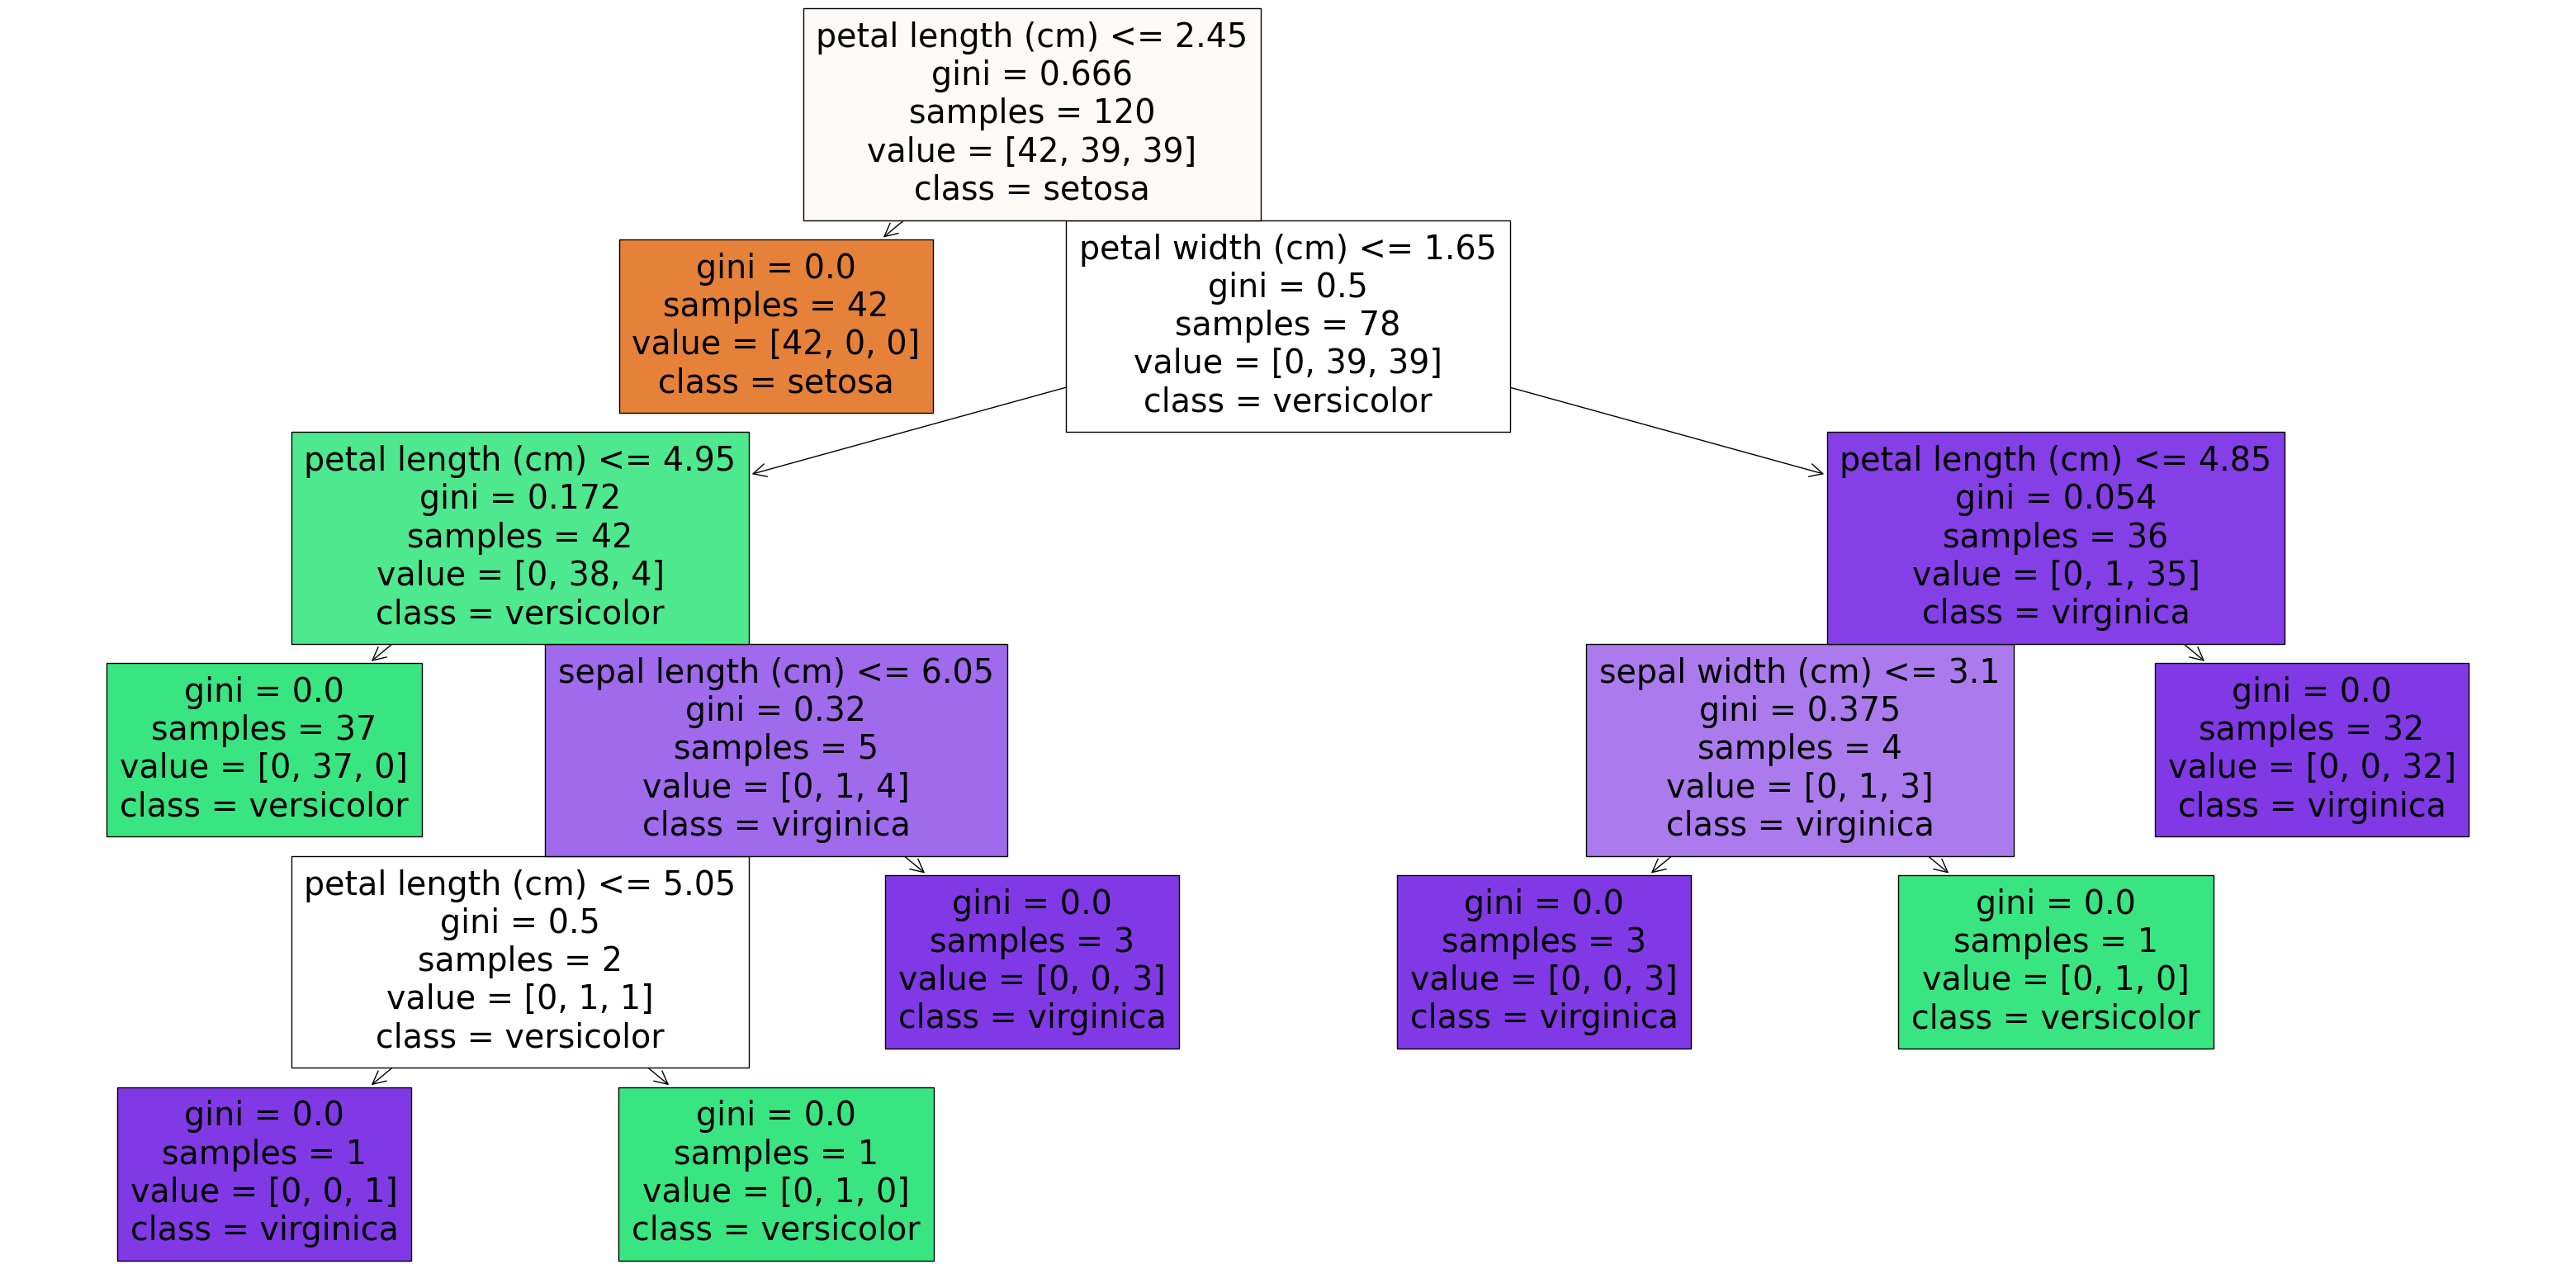

In [51]:
plt.figure(figsize = (40,20))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=pd.unique(y))
plt.show()

In [52]:
#과제 2: 그리드서치를 이용해서 최적의 하이퍼파라미터를 찾자

from sklearn.model_selection import GridSearchCV
params = {'max_depth' : range(1,10,1),
          'min_samples_split' : range(2,30,5),
          'min_samples_leaf' : range(2,30,5)}
GSV_dt = GridSearchCV(DecisionTreeClassifier(), params)
GSV_dt.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(2, 30, 5),
                         'min_samples_split': range(2, 30, 5)})

In [54]:
#최적의 하이퍼 파라미터를 가져왔다
print(GSV_dt.best_params_)
dt_grid_search = GSV_dt.best_estimator_
print('train data:', dt_grid_search.score(X_train, y_train))
print('test data:' ,dt_grid_search.score(X_test, y_test))

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
train data: 0.9833333333333333
test data: 0.9666666666666667


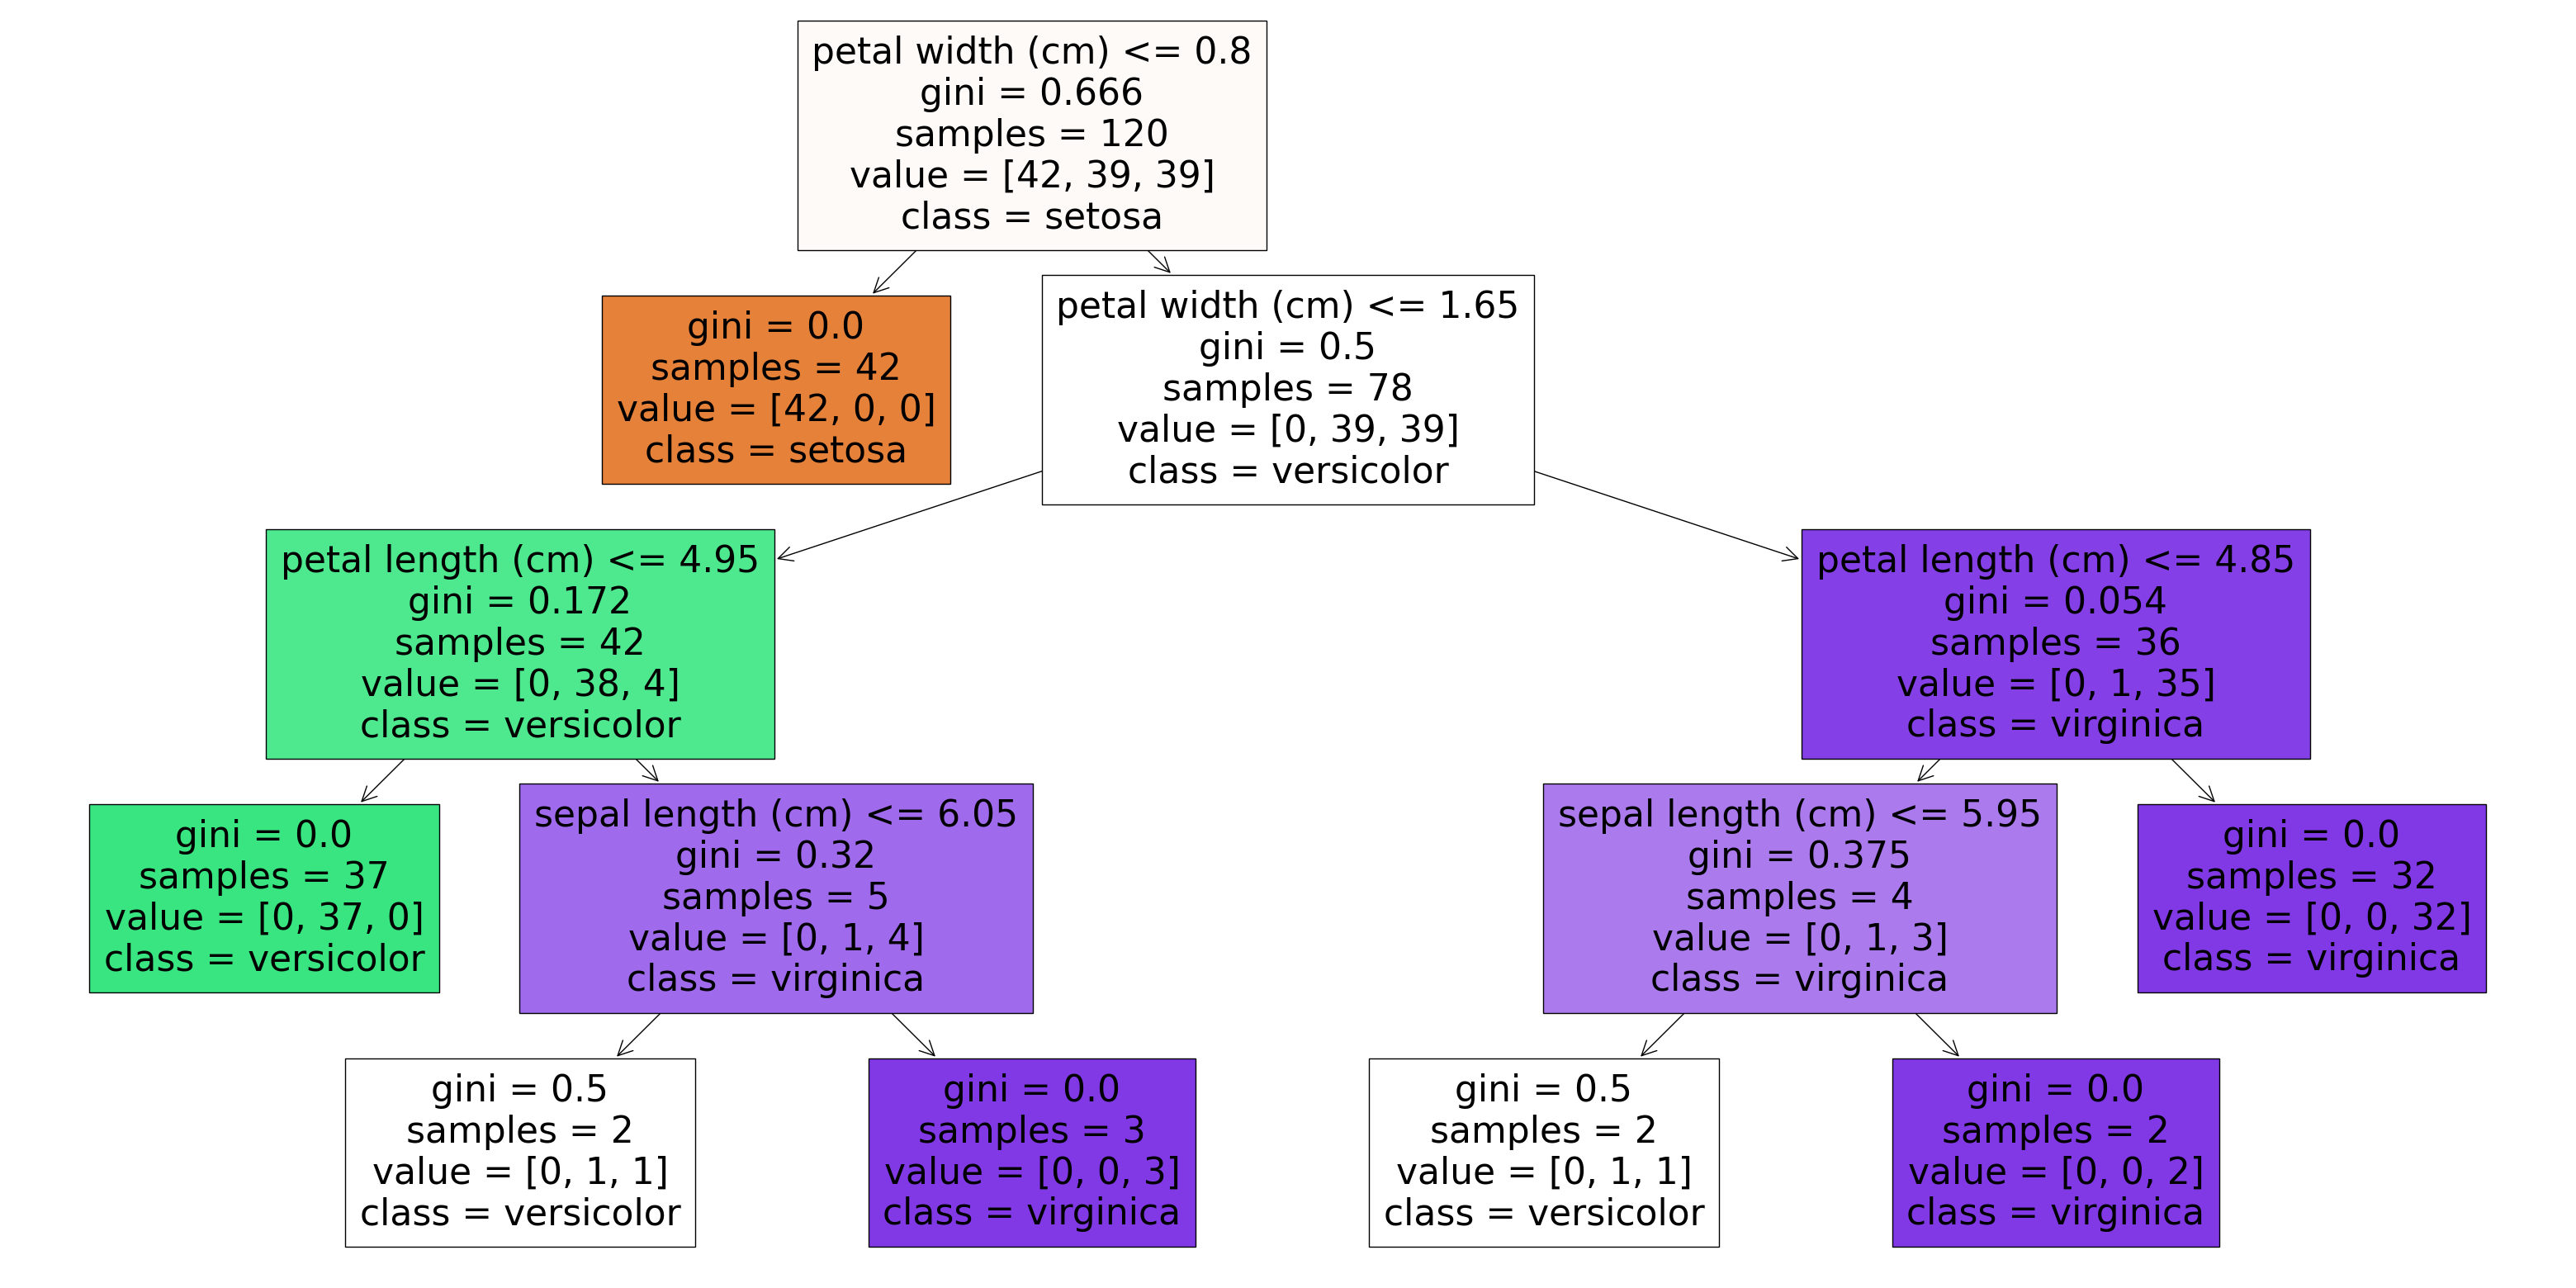

In [56]:
plt.figure(figsize = (40,20))
plot_tree(dt_grid_search , filled=True, feature_names=X.columns, class_names=pd.unique(y))
plt.show()